## Chloe's Explore Notebook for the NLP Group Project

### Imports

In [57]:
import pandas as pd
import numpy as np

# Scraping
import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud

# Regex
import re

# Time
from time import strftime

import unicodedata
import json
from pprint import pprint

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Imports
import acquire 
from prepare import *

# Turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_colwidth', -1)

### Acquire

In [58]:
# acquire.scrape_github_data()

In [59]:
# df = pd.DataFrame(acquire.scrape_github_data(),columns=['repo','language','readme_contents'])
# df.head()


In [60]:
df = pd.read_json('repo_readmes.json')

In [61]:
df.shape

(180, 3)

In [62]:
original = pd.read_json('repo_readmes.json')
print(original)

                                 repo          language  \
0           using-system/LightningPay                C#   
1     drminnaar/react-bitcoin-monitor        JavaScript   
2                      lbryio/lbrycrd               C++   
3    ElementsProject/lightning-charge        JavaScript   
4            kilimchoi/cryptocurrency              None   
..                                ...               ...   
175           justinmoon/digital-cash            Python   
176      richardgill/BitcoinEmissions              None   
177                 BlueWallet/LndHub        JavaScript   
178              Cvar1984/pemulungBTC               PHP   
179             TheDoctorAI/AI-Trader  Jupyter Notebook   

                                       readme_contents  
0    # LightningPay\nBitcoin Lightning Network Paym...  
1    # React Bitcoin Monitor\n\nAn app that monitor...  
2    # LBRYcrd - The LBRY blockchain\n\n[![Build St...  
3    # Lightning Charge\n\n[![build status](https:/...  
4    C

### Prepare

In [63]:
df.head()

,repo,language,readme_contents
0,using-system/LightningPay,C#,# LightningPay\nBitcoin Lightning Network Paym...
1,drminnaar/react-bitcoin-monitor,JavaScript,# React Bitcoin Monitor\n\nAn app that monitor...
2,lbryio/lbrycrd,C++,# LBRYcrd - The LBRY blockchain\n\n[![Build St...
3,ElementsProject/lightning-charge,JavaScript,# Lightning Charge\n\n[![build status](https:/...
4,kilimchoi/cryptocurrency,None,Check out https://coinbuddy.co/coins to track ...


In [64]:
# if you want to see the whole column contents:
# pd.set_option('display.max_colwidth', -1)

In [65]:
# how many language observations do we have?

df.language.value_counts(normalize = True)

JavaScript          0.253012
Python              0.204819
C++                 0.096386
PHP                 0.090361
C                   0.066265
Go                  0.042169
HTML                0.042169
Java                0.030120
Ruby                0.030120
C#                  0.024096
Jupyter Notebook    0.024096
TypeScript          0.018072
Shell               0.018072
Perl                0.006024
Rust                0.006024
SCSS                0.006024
Dart                0.006024
VHDL                0.006024
CoffeeScript        0.006024
R                   0.006024
Vue                 0.006024
Prolog              0.006024
CSS                 0.006024
Name: language, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             180 non-null    object
 1   language         166 non-null    object
 2   readme_contents  180 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


Split data since we will be modeling. 

In [67]:
df.isnull().sum()

repo                0
language           14
readme_contents     0
dtype: int64

In [68]:
# drop null rows for specific columns only
df = df[df.language.notnull()]

In [69]:
df.isnull().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [70]:
df.language.value_counts()

JavaScript          42
Python              34
C++                 16
PHP                 15
C                   11
Go                   7
HTML                 7
Ruby                 5
Java                 5
C#                   4
Jupyter Notebook     4
TypeScript           3
Shell                3
Perl                 1
SCSS                 1
Rust                 1
Dart                 1
VHDL                 1
CoffeeScript         1
R                    1
Vue                  1
Prolog               1
CSS                  1
Name: language, dtype: int64

In [71]:
def common_language(string):
    """
    Takes in a string and compares it to a predefined user list
    if string not in list changes to 'Other'
    """
    language_list= ['JavaScript', 'Python', 'C++', 'PHP', 'C', 'Java']
    if string not in language_list:
        string = 'Other'
    return string

   # Save the names of the top 5 programming languages, and change the rest to 'Other'
    df['language'] = df.language.apply(common_language)

In [72]:
df['language'] = df.language.apply(common_language)

In [73]:
# how many language observations do we have?

df.language.value_counts(normalize = True)

Other         0.259036
JavaScript    0.253012
Python        0.204819
C++           0.096386
PHP           0.090361
C             0.066265
Java          0.030120
Name: language, dtype: float64

In [74]:
# drop_list = ['CoffeeScript',
# 'R',
# 'CSS',
# 'Prolog',
# 'Vue',
# 'Dart',
# 'Rust',
# 'SCSS',
# 'Perl',
# 'VHDL',
# 'Shell', 
# 'TypeScript'
# ]

In [75]:
# # DROPPING LANGUAGES THAT HAVE FEWER THAN ONE INSTANCE
# # BC IT CREATES PROBLEMS FOR SPLITTING THE DATA
# df = df[~df.language.isin(drop_list)]


In [76]:
df = prep_readme_data(df, 'readme_contents', extra_words=[], exclude_words=[])
df.sample(5)

,repo,language,readme_contents,clean,stemmed,lemmatized
174,ryancdotorg/brainflayer,C,Brainflayer\n===========\n\nBrainflayer is a P...,brainflayer brainflayer proofofconcept brainwa...,brainflay brainflay proofofconcept brainwallet...,brainflayer brainflayer proofofconcept brainwa...
35,bitcoin333/bitcoinbook,Python,# Mastering Bitcoin\nMastering Bitcoin is a bo...,mastering bitcoin mastering bitcoin book devel...,master bitcoin master bitcoin book develop fir...,mastering bitcoin mastering bitcoin book devel...
48,pooler/rollproxy,Python,*********\nRollProxy\n*********\n\nRollProxy i...,rollproxy rollproxy mining proxy bitcoin crypt...,rollproxi rollproxi mine proxi bitcoin cryptoc...,rollproxy rollproxy mining proxy bitcoin crypt...
15,weex/oscommerce-bitcoin,PHP,osCommerce Bitcoin Payment Module v0.6\n\nThis...,oscommerce bitcoin payment module v06 module e...,oscommerc bitcoin payment modul v06 thi modul ...,oscommerce bitcoin payment module v06 module e...
68,Cvar1984/pemulungBTC,PHP,,,,


In [77]:
df=df.drop(columns=['readme_contents', 'clean', 'stemmed'])
df.head()

,repo,language,lemmatized
0,using-system/LightningPay,Other,lightningpay bitcoin lightning network payment...
1,drminnaar/react-bitcoin-monitor,JavaScript,react bitcoin monitor app monitor change _bitc...
2,lbryio/lbrycrd,C++,lbrycrd lbry blockchain build statushttpstravi...
3,ElementsProject/lightning-charge,JavaScript,lightning charge build statushttpsapitraviscio...
5,tip4commit/tip4commit,Other,tip4commit tip next commithttpstip4commitcompr...


In [78]:
# SPLIT
from sklearn.model_selection import train_test_split
# Test set is .2 of original dataframe
train, test = train_test_split(df, test_size = .2, random_state=42, stratify= df.language)
# The remainder is here divided .7 to train and .3 to validate
train, validate = train_test_split(train, test_size=.3, random_state=42, stratify= train.language)
train.shape, validate.shape, test.shape

((92, 3), (40, 3), (34, 3))

In [79]:
X_train = train.drop(columns=['language'])
y_train = pd.DataFrame(train.language, columns=['language'])

X_validate = validate.drop(columns=['language'])
y_validate = pd.DataFrame(validate.language, columns=['language'])

X_test = test.drop(columns=['language'])
y_test = pd.DataFrame(test.language, columns=['language'])

train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((92, 3),
 (40, 3),
 (34, 3),
 (92, 2),
 (92, 1),
 (40, 2),
 (40, 1),
 (34, 2),
 (34, 1))

In [80]:
# how many language observations do we have?

train.language.value_counts(normalize = True)

Other         0.260870
JavaScript    0.250000
Python        0.206522
C++           0.097826
PHP           0.086957
C             0.065217
Java          0.032609
Name: language, dtype: float64

In [81]:
# remove_stopwords(str(train.lemmatized))

In [82]:
# combine all contents in single string by language

javascript_words = (' '.join(train[train.language == 'JavaScript'].lemmatized))
c_plus_plus__words = (' '.join(train[train.language == 'C++'].lemmatized))
c_words = (' '.join(train[train.language == 'C'].lemmatized))
python_words = (' '.join(train[train.language == 'Python'].lemmatized))
php_words = (' '.join(train[train.language == 'PHP'].lemmatized))
java_words = (' '.join(train[train.language == 'Java'].lemmatized))
other_words = (' '.join(train[train.language == 'Other'].lemmatized))
all_words = (' '.join(train.lemmatized))

In [83]:
# all_words

In [84]:
javascript_words = remove_stopwords(str(javascript_words))

In [85]:
c_plus_plus__words = remove_stopwords(str(c_plus_plus__words))

In [86]:
c_words = remove_stopwords(str(c_words))

In [87]:
python_words = remove_stopwords(str(python_words))

In [88]:
java_words = remove_stopwords(str(java_words))

In [89]:
php_words = remove_stopwords(str(php_words))

In [90]:
other_words = remove_stopwords(str(other_words))

In [91]:
all_words = remove_stopwords(str(all_words))

### Explore

In [92]:
# represent contents as word frequencies

javascript_freq = pd.Series(javascript_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus__words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
php_freq = pd.Series(php_words.split()).value_counts()
other_freq = pd.Series(other_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [93]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([javascript_freq, c_plus_plus_freq, c_freq, python_freq, java_freq, php_freq, other_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'c_plus_plus', 'c', 'python', 'java', 'php', 'other', 'all']
word_counts.head()

,javascript,c_plus_plus,c,python,java,php,other,all
td,321,0,0,0,0,0,0,321
bitcoin,104,27,8,60,6,28,62,295
transaction,74,0,0,24,1,3,25,127
data,73,9,6,24,0,4,4,120
bitwork,72,0,0,0,0,0,0,72


In [94]:
java_freq

support       12
wallet        10
key            7
bitcoin        6
address        5
              ..
send           1
mobile         1
cycling        1
protection     1
built          1
Length: 144, dtype: int64

- What are the most frequently occuring words? 

- Are there words that uniquely identify with a certain language's repos? 


In [95]:
# most frequently occuring words: sort by 'all'

word_counts.sort_values('all', ascending=False).head(20)

,javascript,c_plus_plus,c,python,java,php,other,all
td,321,0,0,0,0,0,0,321
address,52,106,12,26,5,69,37,307
bitcoin,104,27,8,60,6,28,62,295
run,68,36,5,25,2,9,82,227
key,11,136,11,28,7,12,17,222
file,20,31,25,22,1,17,42,158
use,40,31,20,16,1,18,32,158
&#9;,2,79,1,0,1,5,69,157
install,32,15,13,36,1,8,50,155
info,10,129,4,2,0,3,1,149


In [96]:
# requently occuring words by language: sort by language
word_counts_sorted = word_counts.sort_values(['javascript', 'c_plus_plus', 'c', 'python', 'java', 'php', 'other', 'all'], ascending=[True, True, True, True, True, True, True, True]).sample(20)

In [97]:
word_counts_sorted

,javascript,c_plus_plus,c,python,java,php,other,all
rather,1,0,2,1,0,0,2,6
due,1,0,0,2,0,0,2,5
pipenv,0,0,0,0,0,0,4,4
wallettx,0,0,0,1,0,0,0,1
developer,15,11,0,4,0,1,16,47
associate,2,0,0,0,0,0,1,3
10jun2019,0,0,0,0,0,0,1,1
paypercall,2,0,0,0,0,0,0,2
outfit,0,0,0,1,0,0,0,1
ledgerhqhwtransportwebusbpackageshwtransportwebusb,0,0,0,0,0,0,1,1


- least common and most common words for each language. 

In [98]:
java_freq.idxmin(), java_freq.idxmax()

('mvn', 'support')

In [99]:
c_plus_plus_freq.idxmin(), c_plus_plus_freq.idxmax()

('dependenciesmacoswithlocalshareddependencies', 'key')

In [100]:
c_freq.idxmin(), c_freq.idxmax()

('nayuta', 'brainflayer')

In [55]:
python_freq.idxmin(), python_freq.idxmax()

('lc5oj_ymxgz', '&#9;')

In [101]:
java_freq.idxmin(), java_freq.idxmax()

('mvn', 'support')

In [54]:
php_freq.idxmin(), php_freq.idxmax()

('mod_rewrite', 'address')

In [102]:
other_freq.idxmin(), other_freq.idxmax()

('httpsxuecnvisitorreaderbookid3modevisitorpathbitcoin_elementary_course_based_on_jupyterlab22_transaction_e4baa4e69893_e4baa4e69893e993bee79a84e99abee782b9ipynb',
 'run')

In [103]:
all_freq.idxmin(), all_freq.idxmax()

('newentry', 'td')

- python vs Javascript for 20 most common words

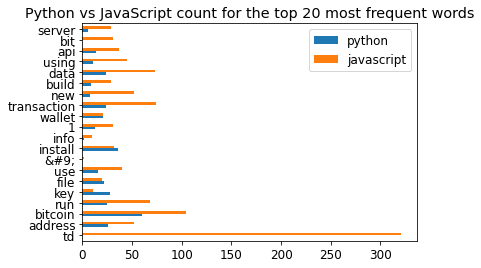

In [106]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['python', 'javascript']].plot.barh()
plt.title('Python vs JavaScript count for the top 20 most frequent words');

- C++ vs JavaScript for 20 most common words

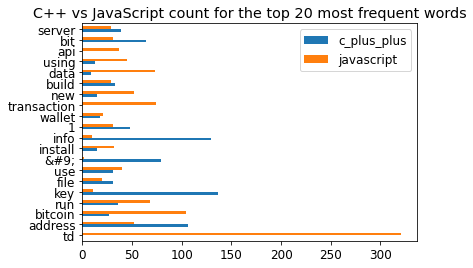

In [107]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['c_plus_plus', 'javascript']].plot.barh()
plt.title('C++ vs JavaScript count for the top 20 most frequent words');

- Java vs JavaScript for 20 most common words

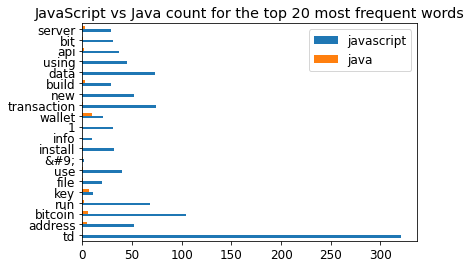

In [108]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh()
plt.title('JavaScript vs Java count for the top 20 most frequent words');

- JavaScript vs C for 20 most common words

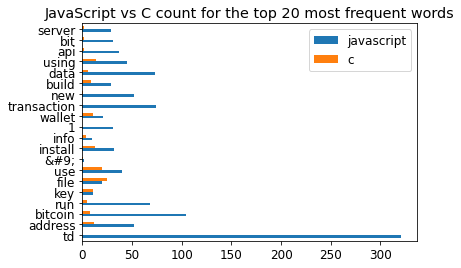

In [109]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'c']].plot.barh()
plt.title('JavaScript vs C count for the top 20 most frequent words');

- Wikitext vs AsciiDoc for 20 most common words

In [ ]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'asciidoc']].plot.barh()
plt.title('Wikitext vs AsciiDoc count for the top 20 most frequent words');

- Wikitext vs HTML for 20 most common words

In [ ]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['wiki', 'html']].plot.barh()
plt.title('Wikitext vs HTML count for the top 20 most frequent words');

- % of Wikitext vs all for 20 most common words

In [ ]:
plt.figure(figsize=(12, 6))

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'wiki')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Wikitext vs all for the most common 20 words')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

- exploring n-grams
    - what are the most common bigrams? 
    - most common bigrams by language

In [ ]:
# most common bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams');

In [ ]:
# most common Java bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(java_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams');

In [ ]:
# most common C++ bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(c_plus_plus__words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C++ bigrams');

In [ ]:
# most common Wikitext bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(wiki_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Wikitext bigrams');

In [ ]:
# most common TypeScript bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(type_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common TypeScript bigrams');

In [ ]:
# most common C bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(c_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common C bigrams');

In [ ]:
# most common AsciiDoc bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(ascii_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common AsciiDic bigrams');

In [ ]:
# most common Python bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(python_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Python bigrams');

In [ ]:
# most common HTML bigrams
plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(html_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common HTML bigrams');

Create a word cloud of the most common words used in all

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 9))
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

### Modeling

### TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.language

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [ ]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [ ]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
test['tree_predicted'] = tree.predict(X_test)

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))

### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_bag_of_words = cv.fit_transform(df.lemmatized)
y = df.language

In [ ]:
X_bag_of_words.todense()

In [ ]:
cv.get_feature_names()

In [ ]:
# Shows the column location of each word
cv.vocabulary_

In [ ]:
bow = pd.DataFrame(X_bag_of_words.todense(), columns=cv.get_feature_names())
bow

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bag_of_words, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [ ]:
tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
test['tree_predicted'] = tree.predict(X_test)

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))

### n-grams as a feature engineering

In [ ]:
cv = CountVectorizer(ngram_range=(2, 2))
bigrams = cv.fit_transform(df.lemmatized)

pprint(df.lemmatized)
pd.DataFrame(bigrams.todense(), columns=cv.get_feature_names())

In [ ]:
pd.DataFrame(bigrams.todense(), columns=cv.get_feature_names())['your system']

In [ ]:
pd.DataFrame(bigrams.todense(), columns=cv.get_feature_names())['your system'].sum()